In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
linear_model = joblib.load("../models/linear_model.pkl")
ridge_model = joblib.load("../models/ridge_model.pkl")

In [3]:
df = pd.read_csv("../data/processed.csv.gz", compression='gzip')

In [4]:
df['Year'] = df['Year'].astype(int)

train_df = df[df['Year'] < 2020]
test_df = df[df['Year'] >= 2020]

X_train = train_df.drop(columns=['AveragePrice'])
y_train = train_df['AveragePrice']

X_test = test_df.drop(columns=['AveragePrice'])
y_test = test_df['AveragePrice']

In [6]:
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

In [7]:
def print_metrics(name, y_true, y_pred):
    print(f'\n{name}')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.2f}')

print_metrics('Linear Regression', y_test, y_pred_linear)
print_metrics('Ridge Regression', y_test, y_pred_ridge)


Linear Regression
R2: 0.9615
RMSE: 27751.87
MAE: 20659.18

Ridge Regression
R2: 0.9622
RMSE: 27501.14
MAE: 20573.69


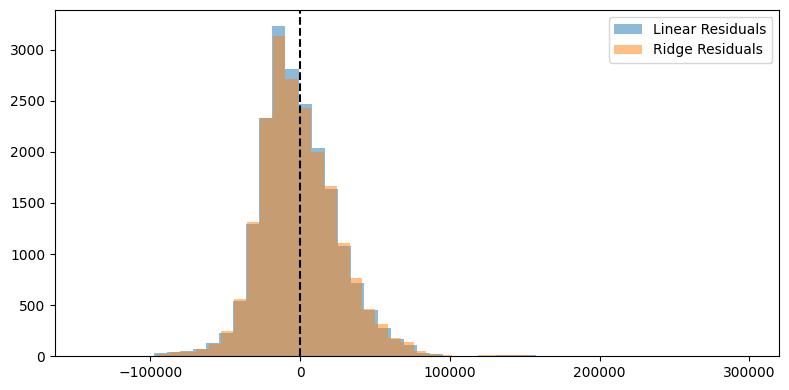

In [8]:
plt.figure(figsize=(8, 4))
plt.hist(y_test - y_pred_linear, bins=50, alpha=.5, label='Linear Residuals')
plt.hist(y_test - y_pred_ridge, bins=50, alpha=.5, label='Ridge Residuals')
plt.axvline(0, color='k', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()